In [145]:
# import required libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import matplotlib_inline
from matplotlib import cm
import matplotlib_inline
import seaborn as sns
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [41]:
# extract all match names in directory as a list 
files = os.listdir('matches_2021_json')

In [132]:
# avoid last file 'players.json' indexed as '-1'
for i in files[:-1]:
    with open('matches_2021_json\\' + i, 'r') as f:
        data = json.load(f)
   
    # convert list of dictionaries into data frame 
    events = pd.DataFrame(data['events'])
    
    # reset indices
    events = events.reset_index()
    events.drop('index', axis = 1, inplace = True)   
    
    # rearrange columns
    # since only single match has less than 23 columns which is '397511822166547-Halmstad-DegerforsIF'
    if len(events.columns) < 23:
        col_rearr = ['external_id', 'team', 'player', 'next_player', 'xpos', 'ypos', 'xdest', 'ydest', 'start_time', 'end_time',
                    'action', 'xg', 'xt', 'xp','game_time', 'header', 'penalty', 'throw_in']
    else:
        col_rearr = ['external_id','team', 'player', 'next_player', 'xpos', 'ypos', 'xdest', 'ydest', 'start_time', 
                     'end_time','action', 'xg', 'xt', 'xp','game_time', 'header', 'penalty', 'throw_in', 'attack_type', 
                    'corner_outcome', 'foot_used', 'one_touch', 'goal_mouth']
    events = events[col_rearr]
    
    # replace all None values with NaN (missing value)
    events.fillna(value = np.nan, inplace = True)
    
    # save dataframe 
    file_name = i.split('.')[0]
    events.to_csv('matches_2021_csv\\' + file_name + '.csv', index = False)

In [13]:
# load info 'how much players played in each game'
with open('matches_2021_json\\allsvenskan, 2021-players.json', 'r') as f:
    data2 = json.load(f)

# aggregate results into data frame
playing_time = pd.DataFrame()
for i in data2:
    single_col = {'player_name':i['name'], 'team_name':i['team'],
                  'minutes_played':sum(i['minutes']['62163887d0736a3c7964ff4b'].values())}
    playing_time = pd.concat([playing_time, pd.DataFrame([single_col])])

playing_time.reset_index(inplace = True, drop = True)

In [15]:
playing_time

,player_name,team_name,minutes_played
0,Christopher Mc Vey,IF Elfsborg,2307
1,Tashreeq Matthews,Varbergs BoIS FC,1969
2,Ali Youssef,BK Häcken,389
3,Mikael Lustig,AIK,2491
4,Davor Blazevic,Hammarby,96
...,...,...,...
432,Emanuel Chabo,IFK Norrköping FK,212
433,Johannes Bjarnason,IFK Norrköping FK,198
434,Kalpi Wilfried Ouattara,Östersund,92
435,Sebastian Lagerlund,BK Häcken,200


In [ ]:
# Incorrect minutes data for players. Examples are below:
# Justin Salmon, Degerfors
# Ali Youssef, Hacken

In [ ]:
# quick links
# https://fbref.com/en/comps/29/11002/2021-Allsvenskan-Stats
# https://fbref.com/en/comps/29/11002/stats/2021-Allsvenskan-Stats#all_stats_standard

In [66]:
match_results = pd.read_csv("match_results.csv")

In [67]:
# create column indices to be removed
rm_col_ind = np.r_[0:5, 6, -5:0]
# remove columns
match_results = match_results.drop(columns = match_results.columns[rm_col_ind], axis = 1)
# make all column names lowercase
match_results = match_results.rename(str.lower, axis='columns')
# save refined .csv file
match_results.to_csv('match_results.csv', index = False)

In [48]:
player_stats = pd.read_csv('player_stats.csv')

In [49]:
# create column indices to be removed
rm_col_ind = np.r_[0, 2, -1]
# remove columns
player_stats = player_stats.drop(columns = player_stats.columns[rm_col_ind], axis = 1)
# make all column names lowercase
player_stats = player_stats.rename(str.lower, axis='columns')


In [70]:
player_stats.to_csv('player_stats.csv', index = False)

In [71]:
player_stats

,squad,player,nation,pos,age,mp_playing_time,starts_playing_time,min_playing_time,mins_per_90_playing_time,gls,...,g_minus_pk,pk,pkatt,crdy,crdr,gls_per_minutes,ast_per_minutes,g+a_per_minutes,g_minus_pk_per_minutes,g+a_minus_pk_per_minutes
0,Malmö,Anel Ahmedhodzic,BIH,DF,21.0,25,25,2250.0,25.0,1.0,...,1.0,0.0,0.0,6.0,0.0,0.04,0.04,0.08,0.04,0.08
1,Malmö,Antonio Čolak,CRO,FW,27.0,26,24,2123.0,23.6,14.0,...,12.0,2.0,3.0,3.0,0.0,0.59,0.17,0.76,0.51,0.68
2,Malmö,Veljko Birmančević,SRB,"MF,FW",22.0,28,23,1958.0,21.8,9.0,...,9.0,0.0,0.0,2.0,0.0,0.41,0.09,0.51,0.41,0.51
3,Malmö,Jo Inge Berget,NOR,"MF,FW",30.0,27,22,2012.0,22.4,5.0,...,4.0,1.0,1.0,3.0,0.0,0.22,0.31,0.54,0.18,0.49
4,Malmö,Johan Dahlin,SWE,GK,34.0,19,19,1665.0,18.5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Östersund,Nebiyou Perry,SWE,"FW,MF",21.0,9,5,455.0,5.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.20,0.20,0.00,0.20
479,Östersund,Ahmed Awad,PLE,FW,28.0,9,0,135.0,1.5,1.0,...,1.0,0.0,0.0,0.0,0.0,0.67,0.67,1.33,0.67,1.33
480,Östersund,Kalpi Ouattara,CIV,DF,22.0,1,0,19.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
481,Östersund,Jakob Gustafsson,NaN,MF,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
files = os.listdir('matches_2021_json/')

In [77]:
df = pd.read_csv('matches_2021_csv/' + files[0])

In [103]:
df['goal_mouth'].unique()

array([nan, 'Bottom-Left', '-', 'Top-Left', 'Bottom-Right', 'Mid-Left',
       'Top-Center'], dtype=object)

In [94]:
df[df['action'] == 'Shot on target saved']

,external_id,team,player,next_player,xpos,ypos,xdest,ydest,start_time,end_time,...,xp,game_time,header,penalty,throw_in,attack_type,corner_outcome,foot_used,one_touch,goal_mouth
651,651,Örebro,Bobby Allain,NaN,25,66,NaN,NaN,2086,2089,...,NaN,35,False,False,False,NaN,NaN,NaN,NaN,-
826,826,BK Häcken,Pontus Dahlberg,NaN,11,29,NaN,NaN,2619,2622,...,NaN,44,False,False,False,NaN,NaN,NaN,NaN,-
1110,1110,Örebro,Bobby Allain,NaN,4,37,NaN,NaN,3436,3439,...,NaN,58,False,False,False,NaN,NaN,NaN,NaN,-
1419,1419,BK Häcken,Pontus Dahlberg,NaN,27,51,NaN,NaN,4510,4513,...,NaN,76,False,False,False,NaN,NaN,NaN,NaN,-
1593,1593,BK Häcken,Pontus Dahlberg,NaN,13,64,NaN,NaN,5026,5029,...,NaN,84,False,False,False,NaN,NaN,NaN,NaN,-
1597,1597,BK Häcken,Pontus Dahlberg,NaN,4,37,NaN,NaN,5028,5031,...,NaN,84,False,False,False,NaN,NaN,NaN,NaN,-


In [95]:
df[df['action'] == 'Goal conceded']

,external_id,team,player,next_player,xpos,ypos,xdest,ydest,start_time,end_time,...,xp,game_time,header,penalty,throw_in,attack_type,corner_outcome,foot_used,one_touch,goal_mouth
493,493,Örebro,Bobby Allain,NaN,10,51,NaN,NaN,1386,1391,...,NaN,24,False,True,False,NaN,NaN,NaN,NaN,Bottom-Left
684,684,Örebro,Bobby Allain,NaN,21,36,NaN,NaN,2239,2244,...,NaN,38,False,False,False,NaN,NaN,NaN,NaN,Top-Left
1391,1391,BK Häcken,Pontus Dahlberg,NaN,13,30,NaN,NaN,4301,4306,...,NaN,72,False,False,False,NaN,NaN,NaN,NaN,Bottom-Right
1548,1548,BK Häcken,Pontus Dahlberg,NaN,20,62,NaN,NaN,4879,4884,...,NaN,82,False,False,False,NaN,NaN,NaN,NaN,Mid-Left
1591,1591,BK Häcken,Pontus Dahlberg,NaN,4,49,NaN,NaN,5025,5030,...,NaN,84,False,False,False,NaN,NaN,NaN,NaN,Top-Center


In [100]:
df[['action', 'xpos', 'ypos', 'xdest', 'ydest', 'goal_mouth']][490:495]

,action,xpos,ypos,xdest,ydest,goal_mouth
490,Pass accurate,93,28,90.0,43.0,NaN
491,Foul,10,59,NaN,NaN,NaN
492,Goal,90,49,NaN,NaN,Bottom-Left
493,Goal conceded,10,51,NaN,NaN,Bottom-Left
494,Pass accurate,49,51,29.0,51.0,NaN


In [105]:
df[['action', 'xpos', 'ypos', 'xdest', 'ydest', 'goal_mouth']][1545:1550]

,action,xpos,ypos,xdest,ydest,goal_mouth
1545,Carry,73,8,89.0,8.0,NaN
1546,Pass accurate,73,9,90.0,16.0,NaN
1547,Goal,80,38,NaN,NaN,Mid-Left
1548,Goal conceded,20,62,NaN,NaN,Mid-Left
1549,Pass accurate,87,13,74.0,21.0,NaN


In [116]:
csv_files = os.listdir('matches_2021_csv/')

all_match_events = pd.DataFrame()
for i in csv_files:
    df = pd.read_csv('matches_2021_csv/'+ i)
    all_match_events = pd.concat([all_match_events, df])
all_match_events.to_csv('all_match_events.csv', index = False)    

In [117]:
all_match_events.shape

(409713, 23)

In [118]:
all_match_events

,external_id,team,player,next_player,xpos,ypos,xdest,ydest,start_time,end_time,...,xp,game_time,header,penalty,throw_in,attack_type,corner_outcome,foot_used,one_touch,goal_mouth
0,0,BK Häcken,Tobias Heintz,Alexander Faltsetas,51,50,37.0,56.0,0,3,...,0.882111,1,False,False,False,NaN,NaN,NaN,NaN,NaN
1,1,BK Häcken,Alexander Faltsetas,Godswill Ekpolo,37,52,40.0,9.0,1,4,...,0.772046,1,False,False,False,NaN,NaN,NaN,NaN,NaN
2,2,BK Häcken,Godswill Ekpolo,Joona Toivio,41,7,27.0,25.0,7,10,...,0.906022,1,False,False,False,NaN,NaN,NaN,NaN,NaN
3,3,BK Häcken,Joona Toivio,Johan Hammar,25,29,25.0,68.0,10,13,...,0.895334,1,False,False,False,NaN,NaN,NaN,NaN,NaN
4,4,BK Häcken,Johan Hammar,Joona Toivio,31,63,31.0,33.0,15,18,...,0.867001,1,False,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1799,AIK,Zachary Elbouzedi,NaN,90,14,NaN,NaN,5597,5607,...,NaN,94,False,False,False,NaN,NaN,NaN,NaN,NaN
1800,1800,AIK,Zachary Elbouzedi,NaN,92,13,NaN,NaN,5598,5603,...,NaN,94,False,False,False,NaN,NaN,NaN,NaN,NaN
1801,1801,AIK,Zachary Elbouzedi,NaN,66,16,92.0,13.0,5592,5603,...,NaN,94,False,False,False,NaN,NaN,NaN,NaN,NaN
1802,1802,Varbergs BoIS FC,Philip Mårtensson,Joakim Lindner,6,50,24.0,22.0,5600,5610,...,NaN,94,False,False,False,NaN,NaN,NaN,NaN,NaN


In [128]:
xgot = all_match_events[all_match_events['action'] == 'Goal conceded'][['action', 'xpos', 'ypos', 'xdest', 'ydest', 'goal_mouth']]

In [129]:
xgot.head()

,action,xpos,ypos,xdest,ydest,goal_mouth
493,Goal conceded,10,51,NaN,NaN,Bottom-Left
684,Goal conceded,21,36,NaN,NaN,Top-Left
1391,Goal conceded,13,30,NaN,NaN,Bottom-Right
1548,Goal conceded,20,62,NaN,NaN,Mid-Left
1591,Goal conceded,4,49,NaN,NaN,Top-Center


In [193]:
xgot[xgot['goal_mouth'] == 'BottomLeft']

,action,xpos,ypos,xdest,ydest,goal_mouth
1612,Goal conceded,6,63,NaN,NaN,BottomLeft


In [222]:
xgot['goal_mouth'] = xgot['goal_mouth'].replace('BottomLeft', 'Bottom-Left')
xgot['goal_mouth'] = xgot['goal_mouth'].str.lower()

In [223]:
xgot['goal_mouth'].unique()

array(['bottom-left', 'top-left', 'bottom-right', 'mid-left',
       'top-center', 'top-right', 'bottom-center', 'mid-right',
       'mid-center', nan], dtype=object)

In [232]:
xgot[(xgot['goal_mouth'] == 'top-left') | (xgot['goal_mouth'] == 'top-center') | 
                           (xgot['goal_mouth'] == 'top-right')]

,action,xpos,ypos,xdest,ydest,goal_mouth
684,Goal conceded,21,36,NaN,NaN,top-left
1591,Goal conceded,4,49,NaN,NaN,top-center
1067,Goal conceded,7,50,NaN,NaN,top-right
449,Goal conceded,12,15,NaN,NaN,top-right
1283,Goal conceded,10,63,NaN,NaN,top-center
...,...,...,...,...,...,...
956,Goal conceded,8,45,NaN,NaN,top-right
1521,Goal conceded,5,49,NaN,NaN,top-center
274,Goal conceded,6,61,NaN,NaN,top-center
1255,Goal conceded,7,57,NaN,NaN,top-left


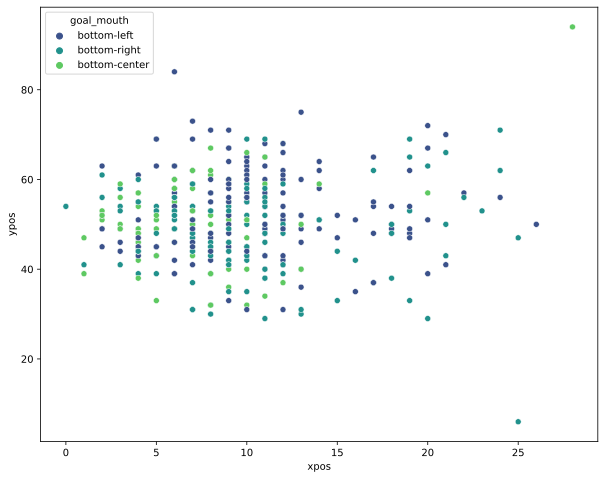

In [236]:
fig, ax = plt.subplots(figsize = (10, 8))
#xgot.plot.scatter('xpos', 'ypos', ax = ax, c = xgot['goal_mouth'].map(color_map))
sns.scatterplot(data = xgot[(xgot['goal_mouth'] == 'bottom-left') | (xgot['goal_mouth'] == 'bottom-center') | 
                           (xgot['goal_mouth'] == 'bottom-right')], 
                x = 'xpos', y = 'ypos', hue = 'goal_mouth', palette = 'viridis')
plt.show()

In [ ]:
# https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib